In [88]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
import pandas as pd
import seaborn as sns
from mpl_toolkits import mplot3d
%matplotlib inline

In [89]:
train_data = pd.read_csv('/content/train.csv')

<Axes: xlabel='Age', ylabel='Fare'>

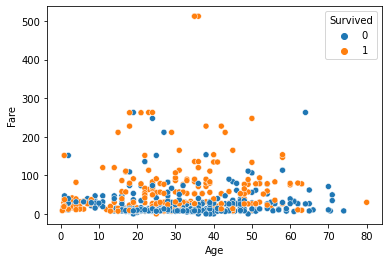

In [90]:
sns.scatterplot(data=train_data , x='Age',y='Fare',hue="Survived")

In [91]:
X1 = np.array(train_data['Age'].fillna(0))
X2 = np.array(train_data['Fare'])
X = np.vstack((X1,X2))
Y = np.array(train_data['Survived'].fillna(1))

1. Define the neural network structure ( # of input units,  # of hidden units, etc). 
2. Initialize the model's parameters
3. Loop:
    - Implement forward propagation
    - Compute loss
    - Implement backward propagation to get the gradients
    - Update parameters (gradient descent)

In [92]:
m = X.shape[1] # number of training samples
n0 = X.shape[0] # number of different input features
n1 = 8 # number of nodes in hidden layer
n2 = 1 # number of nodes in output layer

# INITIALISING THE MODEL PARAMETERS , WEIGHTS AND BIASES
np.random.seed(2)
W1 = np.random.randn(n1,n0)*0.01 # we initialise randomly and then multiply by a number
b1 = np.zeros((n1,1))
W2 = np.random.randn(n2,n1)*0.01
b2 = np.zeros((n2,1))

In [94]:
def compute_cost(A2,y):
  log_y_equal_0 = np.log(1-A2[0])
  log_y_equal_1 = np.log(A2[0])
  term1 = np.dot(y,log_y_equal_1)
  term2 = np.dot(1-y,log_y_equal_0) 
  cost  = -(term1+term2)/m
  return cost

In [95]:
def backward_propagation(parameters, cache, X, Y):
  '''Using Cache to calculate gradients'''
  W1 = parameters['W1'];
  W2 = parameters['W2'];

  A1 = cache['A1']
  A2 = cache['A2']

  dZ2 = A2 - Y
  dW2 = np.matmul(dZ2 , A1.transpose())/m
  db2 = np.sum(dZ2, axis=1 ,keepdims=True )/m
  dZ1 = np.multiply(np.matmul(W2.transpose(),dZ2) , (1 - np.power(A1, 2))); # g'(z) = 1 - a*a ; for g(z) = tanh(z)
  dW1 = np.matmul(dZ1,X.transpose())/m
  db1 = np.sum(dZ1, axis=1 ,keepdims=True )/m

  grads = {"dW1": dW1,
          "db1": db1,
          "dW2": dW2,
          "db2": db2}
    
  return grads

In [96]:
def update_parameters(parameters, grads, learning_rate):
    W1 = copy.deepcopy(parameters["W1"])
    b1 = copy.deepcopy(parameters["b1"])
    W2 = copy.deepcopy(parameters["W2"])
    b2 = copy.deepcopy(parameters["b2"])
    
    
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']

    
    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2

    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [97]:
def nn_model(X, Y, num_iterations ,learning_rate):
    
    # Initialize parameters
    parameters = {'W1':W1 , 'b1':b1 , 'W2':W2 , 'b2':b2}
    

    for i in range(0, num_iterations):
         
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A2, cache = forward_propogation(X, parameters)
        
        # Cost function. Inputs: "A2, Y". Outputs: "cost".
        cost = compute_cost(A2, Y)
 
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backward_propagation(parameters, cache, X, Y)
 
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        parameters = update_parameters(parameters, grads , learning_rate)
        
        # Print the cost every 1000 iterations
        if i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

In [98]:
params = nn_model(X,Y,10000,1)

Cost after iteration 0: 0.692639
Cost after iteration 1000: 0.597699
Cost after iteration 2000: 0.597193
Cost after iteration 3000: 0.595628
Cost after iteration 4000: 0.595299
Cost after iteration 5000: 0.595206
Cost after iteration 6000: 0.594510
Cost after iteration 7000: 0.594328
Cost after iteration 8000: 0.594184
Cost after iteration 9000: 0.594062
